In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
games=pd.read_csv('dataminer.csv')

In [205]:
games.head()

,Title,Sales,Platform(s),Initial_release_date,Developer(s),Publisher(s)
0,Minecraft,200000000,Multi-platform,11/18/2011,Mojang Studios,Mojang Studios
1,Grand Theft Auto V,130000000,Multi-platform,9/17/2013,Rockstar North,Rockstar Games
2,Tetris (EA),100000000,Mobile,9/12/2006,EA Mobile,Electronic Arts
3,Wii Sports,82900000,Wii,11/19/2006,Nintendo EAD,Nintendo
4,PlayerUnknown's Battlegrounds,60000000,Multi-platform,12/20/2017,PUBG Corporation,PUBG Corporation


In [206]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 51 non-null     object
 1   Sales                 51 non-null     int64 
 2   Platform(s)           51 non-null     object
 3   Initial_release_date  51 non-null     object
 4   Developer(s)          51 non-null     object
 5   Publisher(s)          51 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.5+ KB


In [7]:
games.duplicated().value_counts()

False    51
dtype: int64

In [93]:
games.isna().sum()

Title                    0
Sales                    0
Platform(s)              0
Initial  release date    0
Developer(s)             0
Publisher(s)             0
dtype: int64

In [207]:
games.shape

(51, 6)

#  top sales video game .

In [208]:
games['Title'].value_counts()

Minecraft                                           1
Super Mario World                                   1
Pokémon Diamond / Pearl / Platinum                  1
Call of Duty: Black Ops II                          1
Kinect Adventures!                                  1
FIFA 18                                             1
Sonic the Hedgehog                                  1
Nintendogs                                          1
Mario Kart DS                                       1
Call of Duty: Modern Warfare 2                      1
Pokémon Ruby / Sapphire / Emerald                   1
Borderlands 2                                       1
Frogger                                             1
Grand Theft Auto IV                                 1
Lemmings                                            1
Grand Theft Auto: Vice City                         1
The Last of Us                                      1
The Legend of Zelda: Breath of the Wild             1
Brain Age                   

In [209]:
top_sales=games[['Title','Sales']].sort_values('Sales',ascending=False).head()
top_sales

,Title,Sales
0,Minecraft,200000000
1,Grand Theft Auto V,130000000
2,Tetris (EA),100000000
3,Wii Sports,82900000
4,PlayerUnknown's Battlegrounds,60000000


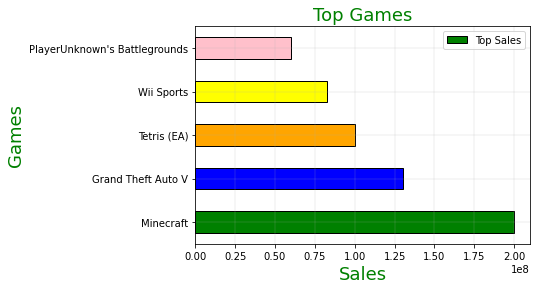

In [210]:
color=['green','blue','orange','yellow','pink']
top_sales.plot.barh('Title','Sales',color=color,fontsize=10,edgecolor='black',label='Top Sales')

plt.xlabel('Sales',fontsize=18,color='green')
plt.ylabel('Games',fontsize=18,color='green')
plt.title('Top Games',fontsize=18,color='green')
plt.grid(linewidth=0.2)
plt.show()

#  which platform has highest game.

In [98]:
games.groupby('Platform(s)')['Title'].count().sort_values(ascending=False).head(1).reset_index()

,Platform(s),Title
0,Multi-platform,27


#   platform wise highest sales .

In [211]:
highest_sales=games.groupby('Platform(s)')['Sales'].sum().sort_values(ascending=False)
highest_sales

Platform(s)
Multi-platform      1033583960
Wii                  255470000
Nintendo DS          122100000
Mobile               100000000
Nintendo 3DS          43660000
Game Boy / NES        43000000
Wii U / Switch        33220000
Game Boy Color        29490000
NES                   28300000
Xbox 360              24000000
Game Boy Advance      22540000
PS3 / PS4             20000000
Switch / Wii U        19080000
Nintendo Switch       18840000
PS2 / PSP             17830000
Name: Sales, dtype: int64

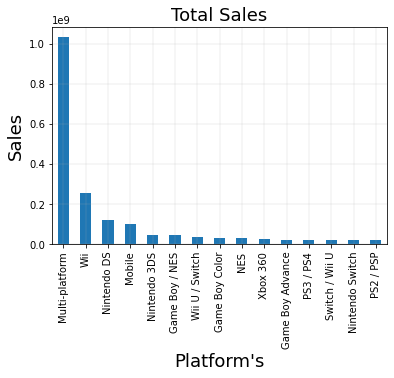

In [212]:
highest_sales.plot.bar()

plt.xlabel("Platform's",fontsize=18,color='black')
plt.ylabel('Sales',fontsize=18,color='black')
plt.title('Total Sales',fontsize=18,color='black')
plt.grid(linewidth=0.2)
plt.show()


#    which year has highest game release.

In [213]:
most_game_release = pd.DatetimeIndex(games['Initial_release_date']).year.value_counts().head(2)
x=pd.DataFrame(most_game_release)
x


,Initial_release_date
2011,5
2006,5


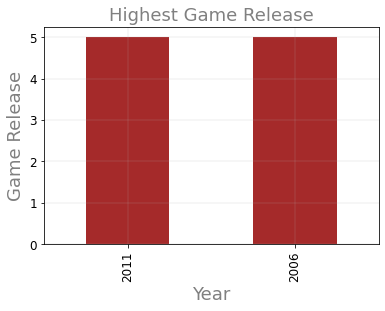

In [214]:
most_game_release.plot.bar(fontsize=12,color='brown')
plt.xlabel('Year',fontsize=18,color='gray')
plt.ylabel('Game Release',fontsize=18,color='gray')
plt.title('Highest Game Release',fontsize=18,color='gray')
plt.grid(linewidth=0.2)
plt.show()

#    which publisher has publish highest game and there total sales

In [215]:
publisher=games.groupby('Publisher(s)')['Sales'].sum().sort_values(ascending=False).head(1)
publisher

Publisher(s)
Nintendo    697583000
Name: Sales, dtype: int64

 # Extra Insights
 
 # Least 10 Sales years

In [217]:
revenues=revenue[['year','Sales']].sort_values('Sales',ascending=True).head(10)
revenues

,year,Sales
0,1988,19000000
1,1981,20000000
2,1990,20972500
3,2016,24950000
4,2015,28000000
5,1984,28300000
6,1999,29490000
7,2014,33220000
8,1980,39098000
9,2002,42540000


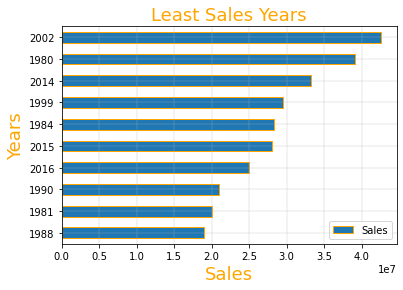

In [163]:

revenues.plot.barh('year','Sales',fontsize=10,edgecolor='orange')

plt.xlabel('Sales',fontsize=18,color='orange')
plt.ylabel('Years',fontsize=18,color='orange')
plt.title('Least Sales Years',fontsize=18,color='orange')
plt.grid(linewidth=0.3)
plt.show()



# Compare top 5 developers who develop the most games

In [171]:
top=games.groupby('Developer(s)')['Title'].count().sort_values(ascending=False).head(5)
top

Developer(s)
Nintendo EAD      12
Game Freak         5
Rockstar North     4
Nintendo R&D1      3
Treyarch           2
Name: Title, dtype: int64

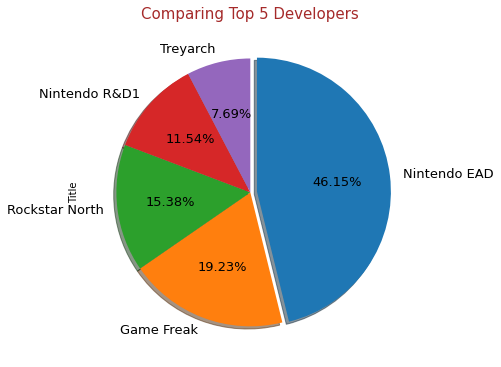

In [202]:
plt.figure(figsize=(6,8))
top.plot.pie(autopct='%.2f%%',explode=[0.05,0,0,0,0],fontsize=13,shadow=True,counterclock=False,startangle=90)
plt.title('Comparing Top 5 Developers',fontsize=15,color='brown')
plt.show()